# This intro mainly focuses on the main forces encountered in this science

## Pressure gradient forces

The force is calculated as the following:

$$
\vec{F}_{\text{PGF}} = -\frac{1}{\rho} \nabla p
$$

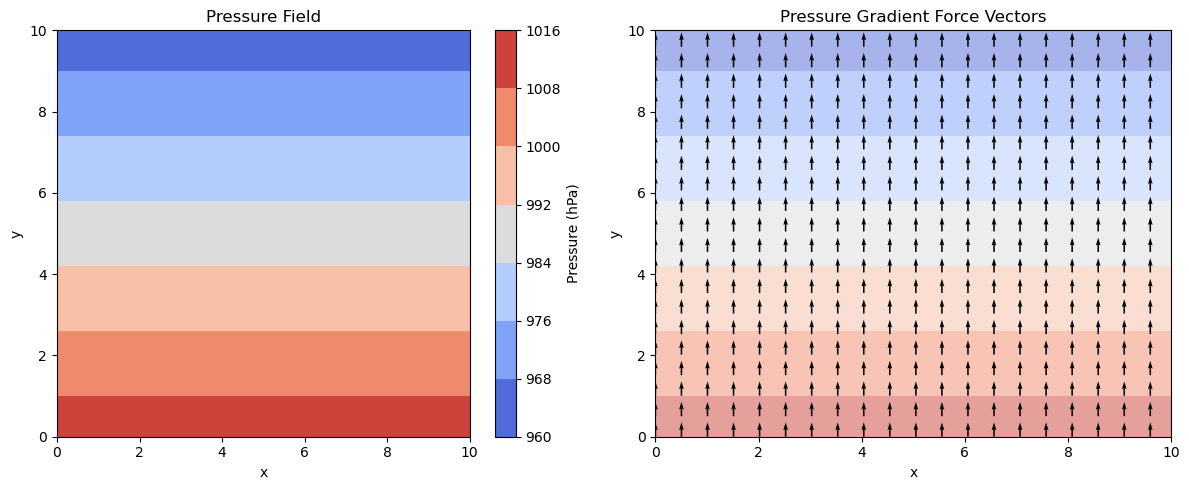

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Define pressure field (decreasing in y)
P = 1013 - 5 * Y  # Pressure in hPa

rho = 1.2

dp_dy, dp_dx = np.gradient(P, y, x)

pgf_x = -1 / rho * dp_dx
pgf_y = -1 / rho * dp_dy

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
contour = plt.contourf(X, Y, P, cmap='coolwarm')
plt.colorbar(contour, label='Pressure (hPa)')
plt.title("Pressure Field")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 2, 2)
plt.contourf(X, Y, P, cmap='coolwarm', alpha=0.5)
plt.quiver(X[::5, ::5], Y[::5, ::5], pgf_x[::5, ::5], pgf_y[::5, ::5], color='black')
plt.title("Pressure Gradient Force Vectors")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()



The resulting is opposed to the increment of pressure as expected by the formula above

## The viscous force

IN a real fluid, internal friction is present, this internal friction are represented by the viscous force: $$ F = \mu \Delta \vec{v} $$ and the friction coefficient is often normalized by the density $\nu = \frac{\mu}{\rho}$ giving the kinetic viscosity coefficient $\nu$

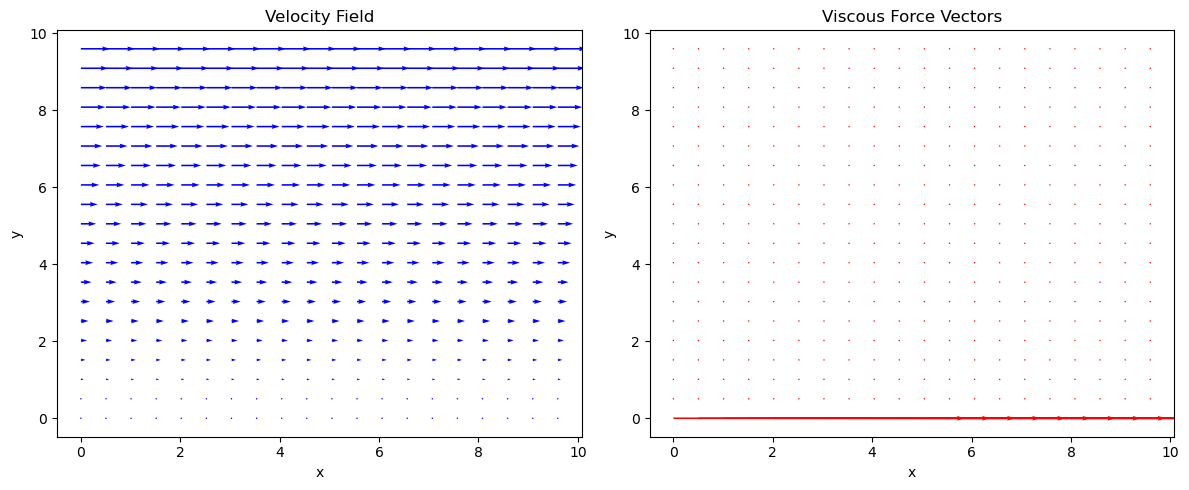

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Grid
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Velocity field: simple shear flow u(y) = y, v = 0
U = Y
V = np.zeros_like(Y)

# Dynamic viscosity (Pa·s)
mu = 0.001

# Compute second derivatives (Laplacian)
dx = x[1] - x[0]
dy = y[1] - y[0]

laplace_U = (
    (np.roll(U, -1, axis=1) - 2 * U + np.roll(U, 1, axis=1)) / dx**2 +
    (np.roll(U, -1, axis=0) - 2 * U + np.roll(U, 1, axis=0)) / dy**2
)

laplace_V = (
    (np.roll(V, -1, axis=1) - 2 * V + np.roll(V, 1, axis=1)) / dx**2 +
    (np.roll(V, -1, axis=0) - 2 * V + np.roll(V, 1, axis=0)) / dy**2
)

# Viscous force components
F_visc_x = mu * laplace_U
F_visc_y = mu * laplace_V

# Plotting
plt.figure(figsize=(12, 5))

# Velocity field
plt.subplot(1, 2, 1)
plt.quiver(X[::5, ::5], Y[::5, ::5], U[::5, ::5], V[::5, ::5], color='blue')
plt.title("Velocity Field")
plt.xlabel("x")
plt.ylabel("y")

# Viscous force vectors
plt.subplot(1, 2, 2)
plt.quiver(X[::5, ::5], Y[::5, ::5], F_visc_x[::5, ::5], F_visc_y[::5, ::5], color='red')
plt.title("Viscous Force Vectors")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()


The friction happening at the lowest part of the graph - illustrated by the vector force vectors in red on the right part of the graph - induce a gradient in the velocity field: a lower velocity closer to the viscous force, increasing while getting farer from it.

As we are mainly interested in the meteo on earth and that gravity plays an important part on it here is the next fondamental force we look at:

# Gravity force

Between two masses the gravity force is the following:
$$ F_g = \frac{G m_1 m_2}{l^2} $$
from that and the 2nd Newton's law we can derive the gravitational constant "g*":
$$ g^* =  \frac{F_g}{m_2} = \frac{G M}{l^2}$$
It is often easier in meteorology to use the height above sea level "z" and the earth radius "a":
$$ g^* = \frac{G M}{(a + z)^2}$$
At the sea level the constant may be easily approximated as:
$$ g^*_0 = \frac{GM}{a^2} $$
This simplifies "g^*" expression as:
$$ g^* = \frac{g^*_0}{(1 + z/a)^2} $$
Note that ofter a >> z so $g^*$ is often approximated as equal to $g^*_0$


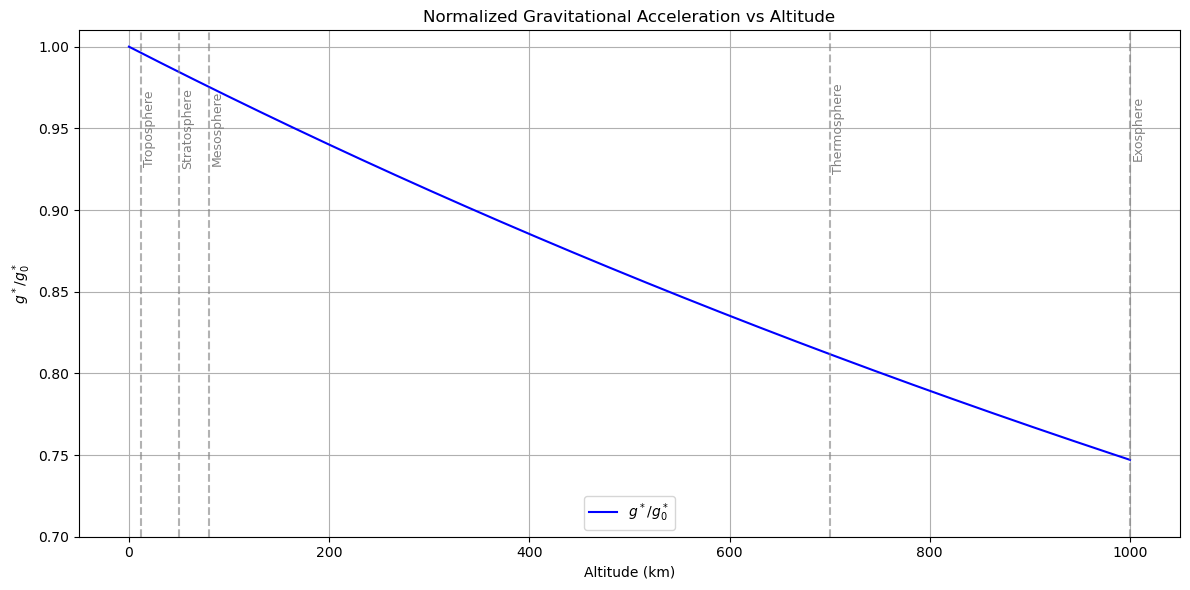

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


G = 6.67430e-11         # gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24           # Earth mass (kg)
a = 6.371e6            # Earth radius (m)

# Altitudes from 0 to 1000 km
z = np.linspace(0, 1e6, 1000)  # in meters

# Gravitational acceleration at sea level
g_star_0 = G * M / a**2

# Gravitational acceleration at altitude z
g_star = g_star_0 * (a / (a + z))**2

# Normalize g_star by g_star_0
g_ratio = g_star / g_star_0

layers = {
    "Troposphere": 12,
    "Stratosphere": 50,
    "Mesosphere": 80,
    "Thermosphere": 700,
    "Exosphere": 1000  # End of plot range
}

plt.figure(figsize=(12, 6))
plt.plot(z / 1000, g_ratio, color="blue", label=r"$g^*/g^*_0$")
plt.xlabel("Altitude (km)")
plt.ylabel(r"$g^*/g^*_0$")
plt.title("Normalized Gravitational Acceleration vs Altitude")
plt.grid(True)


for name, alt in layers.items():
    plt.axvline(x=alt, color='gray', linestyle='--', alpha=0.6)
    plt.text(alt + 2, 0.95, name, rotation=90, verticalalignment='center', fontsize=9, color='gray')

plt.ylim(0.7, 1.01)
plt.legend()
plt.tight_layout()
plt.show()


It is to note that the main interesting events are located in the toposphere.

As the referential on earth is non-inertial, we also need to deal with "apparent forces". The first one discussed will be:
# The Centrifugal force (& centripetal acceleration)

If we consider a finit volume unit rotating around earth, it's position evolves as the following: $$ \vec{r}(t) = r cos(\Omega t) \hat{x} + r sin(\Omega t) \hat{y} $$
With $ \Omega $ being the change of angle overtime - speed of rotation.
The speed of the volume unit is the following:
$$ \vec{v}(t) = \frac{d\vec{r}(t)}{dt} = r \Omega (- \sin(\Omega t) \hat{x} + \cos(\Omega t) \hat{y}) $$
giving a magnitude of $r \Omega$. If we then look at the centripetal acceleration:
$$
\vec{a}(t) = \frac{d\vec{v}(t)}{dt} = r \Omega^2 \left( - \cos(\Omega t) \hat{x} - \sin(\Omega t) \hat{y} \right)
$$
giving a magnitude of $r \Omega^2 = \frac{v^2}{r}$


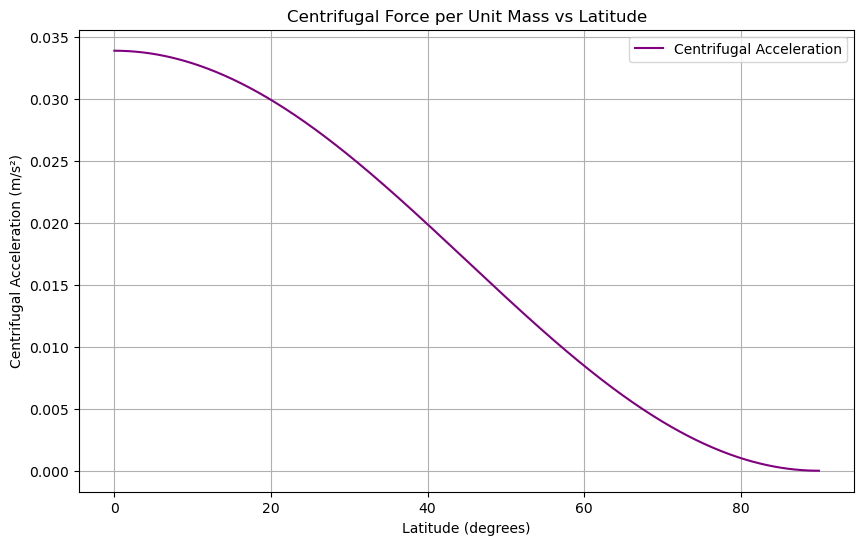

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Omega = 7.2921e-5  # Earth's angular velocity in rad/s
a = 6.371e6        # Earth's radius in meters

# Latitude range from Equator (0°) to Pole (90°)
lat_deg = np.linspace(0, 90, 500)
lat_rad = np.radians(lat_deg)

# Centrifugal acceleration per unit mass
f_centrifugal = Omega**2 * a * np.cos(lat_rad)**2

# Plot
plt.figure(figsize=(10, 6))
plt.plot(lat_deg, f_centrifugal, label='Centrifugal Acceleration', color='purple')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Centrifugal Acceleration (m/s²)")
plt.title("Centrifugal Force per Unit Mass vs Latitude")
plt.grid(True)
plt.legend()
plt.show()


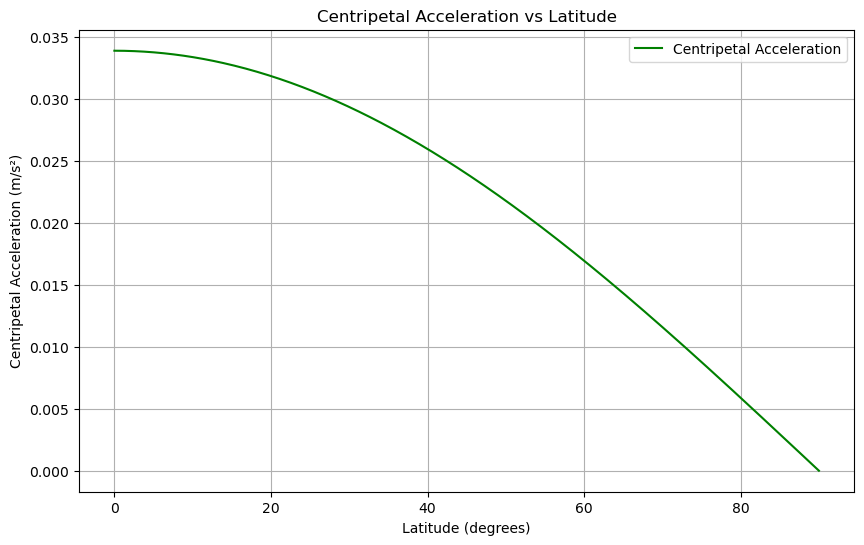

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Omega = 7.2921e-5  # Earth's angular velocity in rad/s
a = 6.371e6        # Earth's radius in meters

# Latitude from Equator to Pole
lat_deg = np.linspace(0, 90, 500)
lat_rad = np.radians(lat_deg)

r = a * np.cos(lat_rad)

a_centripetal = Omega**2 * r

plt.figure(figsize=(10, 6))
plt.plot(lat_deg, a_centripetal, label='Centripetal Acceleration', color='green')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Centripetal Acceleration (m/s²)")
plt.title("Centripetal Acceleration vs Latitude")
plt.grid(True)
plt.legend()
plt.show()



One can easily see why the centripetal acceleration diminish as we go up in lattitude - to the north pole - where the unit of volume is basically static. Now let's take a look at the influence of the centripeta force on the perceived gravity force:

# Gravity force + Centripetal force

While the gravity points toward the center of the earth the centripetal force - not a real forc but perceived as one when on a rotating object as the earth - points toward the rotation axis of the earth.
Giving:
$$ \vec{g^*} = \vec{g} + \vec{a} $$

Resulting in a slightly (often neglectable) tilt from the true gravitational force.

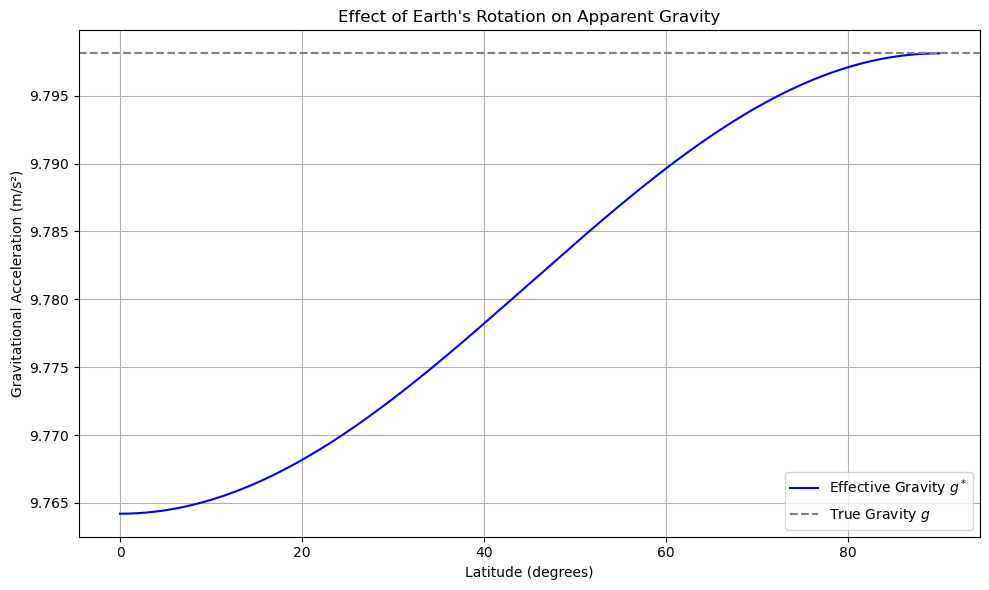

In [32]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67430e-11  # gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Earth mass (kg)
a = 6.3781e6     # Earth equatorial radius (m)
Omega = 7.2921150e-5  # Earth's angular velocity (rad/s)

lat_deg = np.linspace(0, 90, 500)
lat_rad = np.radians(lat_deg)

r = a 

g_true = G * M / r**2  

a_centrifugal = Omega**2 * r * np.cos(lat_rad)**2

g_effective = g_true - a_centrifugal

plt.figure(figsize=(10, 6))
plt.plot(lat_deg, g_effective, label='Effective Gravity $g^*$', color='blue')
plt.axhline(g_true, linestyle='--', color='gray', label='True Gravity $g$')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Gravitational Acceleration (m/s²)")
plt.title("Effect of Earth's Rotation on Apparent Gravity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
